**Group Members**

1.Watcharavit Lapinee

2.Varisara Boonyuang

3.Wisansaya Tipparot

# **Load Dependencies**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 2.8 MB/s 
     |████████████████████████████████| 14.6 MB 111 kB/s 
     |████████████████████████████████| 248 kB 56.1 MB/s 
     |████████████████████████████████| 167 kB 57.9 MB/s 
     |████████████████████████████████| 6.8 MB 21.4 MB/s 
     |████████████████████████████████| 80 kB 8.7 MB/s 
     |████████████████████████████████| 1.3 MB 44.5 MB/s 
     |████████████████████████████████| 1.7 MB 35.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 2.0 MB 51.8 MB/s 
     |████████████████████████████████| 271 kB 59.1 MB/s 
     |████████████████████████████████| 111 kB 57.2 MB/s 
     |████████████████████████████████| 3.1 MB 35.1 MB/s 
     |████████████████████████████████| 10.1 MB 28.6 MB/s 
     |█████████████████

In [ ]:
import pandas as pd
from pycaret.clustering import *

# **Load Data**

In [ ]:
df = pd.read_csv('SupermarketData.csv')

In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
df.tail(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
14760,200626,2006-08-27,1,8,1,0.98,PRD0900121,CL00063,DEP00019,G00007,D00002,CUST0000820750,LA,OA,994102000676156,M,MM,Small Shop,Fresh,STORE00001,LS,E02
14761,200732,2007-10-03,4,18,1,0.98,PRD0900121,CL00063,DEP00019,G00007,D00002,CUST0000622535,LA,NaN,994107800573212,M,MM,Small Shop,Fresh,STORE00001,LS,E02
14762,200710,2007-05-02,4,8,1,0.98,PRD0900121,CL00063,DEP00019,G00007,D00002,CUST0000820750,LA,OA,994105600707426,M,LA,Small Shop,Grocery,STORE00001,LS,E02
14763,200731,2007-09-25,3,19,3,2.94,PRD0900121,CL00063,DEP00019,G00007,D00002,CUST0000985195,LA,OA,994107700816493,L,LA,Full Shop,Fresh,STORE00001,LS,E02
14764,200801,2008-03-02,1,14,1,0.98,PRD0900121,CL00063,DEP00019,G00007,D00002,CUST0000578570,LA,OT,99410990054451,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info

<bound method DataFrame.info of        SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
0         200732 2007-10-05             6         17         3   6.75   
1         200733 2007-10-10             4         20         3   6.75   
2         200741 2007-12-09             1         11         1   2.25   
3         200731 2007-09-29             7         17         1   2.25   
4         200737 2007-11-10             7         14         3   6.75   
...          ...        ...           ...        ...       ...    ...   
14760     200626 2006-08-27             1          8         1   0.98   
14761     200732 2007-10-03             4         18         1   0.98   
14762     200710 2007-05-02             4          8         1   0.98   
14763     200731 2007-09-25             3         19         3   2.94   
14764     200801 2008-03-02             1         14         1   0.98   

        PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
0      PRD0900001 

# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs


# Calculate features

In [ ]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max')
                                                                                  ).reset_index()

In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [ ]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [ ]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [ ]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [ ]:
df_csv.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,TicketSize,total_days,recency
0,CUST0000000689,6.20,6,3,2007-07-22,2008-06-23,1.033333,338,13
1,CUST0000001194,62.69,24,10,2006-06-21,2008-06-17,2.612083,728,19
2,CUST0000002637,13.94,6,3,2006-08-06,2008-04-14,2.323333,618,83
3,CUST0000002813,4.86,5,3,2007-07-31,2008-03-21,0.972000,235,107
4,CUST0000003028,1.78,1,1,2008-01-04,2008-01-04,1.780000,1,184


# **Cluster customers**

In [ ]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE'], normalize=True)

,Description,Value
0,session_id,7614
1,Original Data,"(1487, 9)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1487, 52)"
9,CPU Jobs,-1


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7fe566c28b00>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7fe566c...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7fe566c28e60>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7fe566c09b90>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7fe566c09950>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7fe566c09c20>,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0655,13.9825,6.929,0,0,0


In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.607800,35.132700,0.303600,0,0,0
kmeans,0.194600,303.696000,1.556600,0,0,0
hclust,0.167200,272.920400,1.661600,0,0,0
birch,0.138600,262.867900,1.750200,0,0,0
ap,0.120200,25.085700,1.768000,0,0,0
kmodes,-0.065500,13.982500,6.929000,0,0,0
dbscan,-0.163700,4.070500,1.129300,0,0,0


# Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6078,35.1327,0.3036,0,0,0


In [ ]:
plot_model(sc)

# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1946,303.696,1.5566,0,0,0


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7614, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

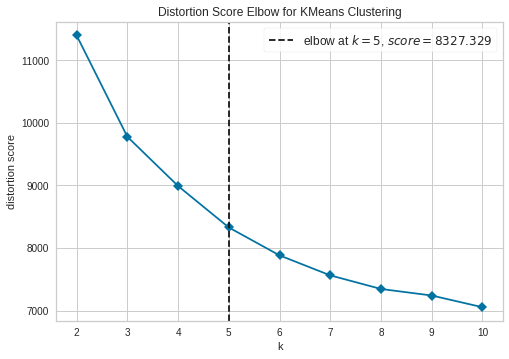

In [ ]:
plot_model(kmeans, plot = 'elbow')

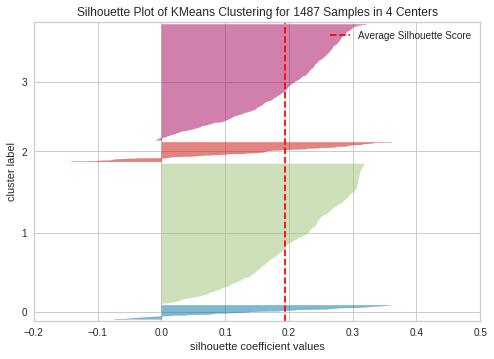

In [ ]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**